<img src="https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo_new_2.png" width="10%">
<h1><center>PyTorch First NN</center></h1>

## Introduction

In this tutorial, we will embark on a journey that starts from manually creating neural network layers, then progresses to using PyTorch's built-in layer wrappers, and culminates with the powerful and modular `nn.Module` class.

 - **Manually Creating Layers**: Dive deep into the basics and construct layers from scratch, offering a glimpse into the essence of neural connections.

 - **PyTorch's Layer Wrappers**: Unveil the convenience of PyTorch's pre-defined layers, making model-building straightforward and optimized.

 - **The `nn.Module` Class**: Grasp the power of this pivotal class, acting as the backbone for structuring and scaling any neural model.

## Preparation

Before we get started, let's create the simple dataset we will use in our experiments.

In [1]:
# import packages
import numpy as np
import torch
import matplotlib.pyplot as plt

In [73]:

# Set a random seed which can replicate the experiments
np.random.seed(42)

# This will generate a 300x2 matrix of numbers where each number is between -1 and 1.5
points = 2.5*np.random.random((300,2))-1

In [3]:
points

array([[-0.0636497 ,  1.37678577],
       [ 0.82998485,  0.49664621],
       [-0.6099534 , -0.6100137 ],
       [-0.85479097,  1.16544036],
       [ 0.50278753,  0.77018144],
       [-0.94853876,  1.42477463],
       [ 1.0811066 , -0.46915222],
       [-0.54543758, -0.54148873],
       [-0.23939439,  0.31189108],
       [ 0.07986255, -0.27192715],
       [ 0.52963224, -0.65126535],
       [-0.26963838, -0.08409539],
       [ 0.14017496,  0.9629399 ],
       [-0.50081554,  0.2855861 ],
       [ 0.48103642, -0.88387397],
       [ 0.51886213, -0.57368969],
       [-0.83737102,  1.37221384],
       [ 1.41408008,  1.02099337],
       [-0.23846558, -0.75581971],
       [ 0.71058257,  0.10038123],
       [-0.69490441,  0.23794228],
       [-0.9140287 ,  1.27330101],
       [-0.35305005,  0.65630571],
       [-0.22072231,  0.30017005],
       [ 0.3667757 , -0.53786386],
       [ 1.42396157,  0.93783206],
       [ 1.34874735,  1.23706838],
       [ 0.49474995,  1.30468559],
       [-0.77876874,

We call the points blue (value 0) if the belong to a region and red if they belong to the other.

To have a simple example let's use the line $2x-y=1$ to separate the regions.

In [74]:
blue = np.array([x for x in points  if 2*x[0]-x[1]<1  ])
red = np.array([x for x in points  if 2*x[0]-x[1]>1  ])

Let's count how many points are red and how many points are blue.

In [5]:
blue

array([[-0.0636497 ,  1.37678577],
       [-0.6099534 , -0.6100137 ],
       [-0.85479097,  1.16544036],
       [ 0.50278753,  0.77018144],
       [-0.94853876,  1.42477463],
       [-0.54543758, -0.54148873],
       [-0.23939439,  0.31189108],
       [ 0.07986255, -0.27192715],
       [-0.26963838, -0.08409539],
       [ 0.14017496,  0.9629399 ],
       [-0.50081554,  0.2855861 ],
       [-0.83737102,  1.37221384],
       [-0.23846558, -0.75581971],
       [-0.69490441,  0.23794228],
       [-0.9140287 ,  1.27330101],
       [-0.35305005,  0.65630571],
       [-0.22072231,  0.30017005],
       [ 0.49474995,  1.30468559],
       [-0.77876874, -0.51004284],
       [-0.88693178, -0.18667417],
       [-0.02830678, -0.32162742],
       [-0.29766373,  0.35674021],
       [-0.64768944,  1.00549245],
       [-0.81362339,  1.46721734],
       [-0.98619471,  1.03865357],
       [ 0.76714336,  0.82251792],
       [-0.10383568, -0.71032735],
       [-0.17275494, -0.84110412],
       [-0.2225442 ,

In [6]:
len(blue),len(red)

(193, 107)

Note that the data is unbalanced.

**Questions:**  
- If you were to create a random assigment with a bias coin, how would you weight the coin?
- What are the consequences of the unbalanced in the training of a classifier?
- If there is any consequence, how can you deal with it?

Let's plot this


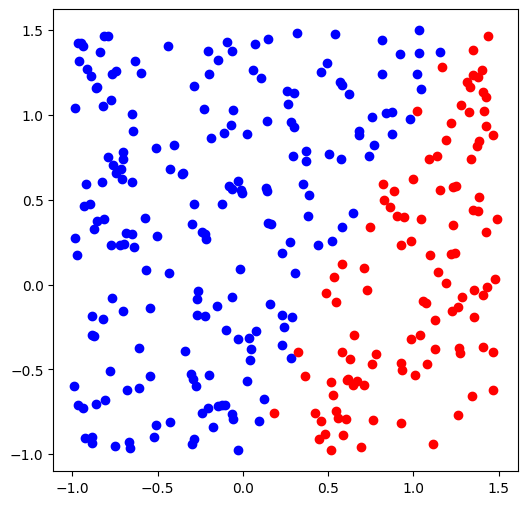

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(blue[:,0],blue[:,1],c='b') # blue[:,0] --> x-axis ,blue[:,1] --> y-axis
plt.scatter(red[:,0],red[:,1],c='r')
plt.show()

and we create the real $y$ values as follows

In [75]:
color=np.array([[1,0] if 2*x[0]-x[1]<1 else [0,1] for x in points])

In [9]:
color.shape

(300, 2)

## Building the network

We are going to build a single layer neural network ending in a softmax.

We need some variables that we can use to feed the data, note that this variables shouldn't have gradients.

In [76]:
from torch.autograd import Variable

# X typically represents the input data (features) and
# y represents the target labels
# Neither the input data nor the target values should be altered by the optimization process. Thus, we don't want the gradient to be computed for these variables during backpropagation
# So we set requires_grad=False
X=Variable(torch.from_numpy(points), requires_grad=False).type(torch.DoubleTensor)
y=Variable(torch.from_numpy(color), requires_grad=False).type(torch.DoubleTensor)

and next we create the variables that will be adjusted by gradient descent.

In [11]:
# First, check the input dimension
print(points.shape)

(300, 2)


In [77]:
# Matrix multiplication goes from N x M * M x P = N x P
# So our W has to be M (number of input features) by P (number of output features)
W=Variable(torch.rand(2,2).type(torch.DoubleTensor),requires_grad=True)
b=Variable(torch.zeros(1,2).type(torch.DoubleTensor),requires_grad=True)
# Here we set W to 2X2 matrix and b to 1x2 matrix instead of 2X1 and 1X1 is that,
# we want to apply the softmax as our activation function

we need to import the activation function (softmax) and the function we will use to compute the error.

In [13]:
from torch.nn.functional import binary_cross_entropy,softmax

and the layer is given by $$y_{pred} = \text{softmax}(x\cdot W_1 +b_1) $$ the following describes the forward and backward steps

In [43]:
def softmax_none_expon(X , W , b):
  numer = 5**(X @ W + b)
  denom = numer.sum(dim=1, keepdim=True)
  return numer / denom

In [44]:
test_y = softmax_none_expon(X,W,b)

In [47]:
color

array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [45]:
test_y

tensor([[0.3735, 0.6265],
        [0.2125, 0.7875],
        [0.7445, 0.2555],
        [0.6495, 0.3505],
        [0.2693, 0.7307],
        [0.6518, 0.3482],
        [0.2282, 0.7718],
        [0.7220, 0.2780],
        [0.5447, 0.4553],
        [0.5034, 0.4966],
        [0.3982, 0.6018],
        [0.5967, 0.4033],
        [0.3532, 0.6468],
        [0.6306, 0.3694],
        [0.4384, 0.5616],
        [0.3935, 0.6065],
        [0.6233, 0.3767],
        [0.0905, 0.9095],
        [0.6556, 0.3444],
        [0.2730, 0.7270],
        [0.6924, 0.3076],
        [0.6565, 0.3435],
        [0.5445, 0.4555],
        [0.5398, 0.4602],
        [0.4383, 0.5617],
        [0.0924, 0.9076],
        [0.0898, 0.9102],
        [0.2278, 0.7722],
        [0.7770, 0.2230],
        [0.7772, 0.2228],
        [0.5443, 0.4557],
        [0.2036, 0.7964],
        [0.5588, 0.4412],
        [0.6020, 0.3980],
        [0.6061, 0.3939],
        [0.2678, 0.7322],
        [0.6996, 0.3004],
        [0.2028, 0.7972],
        [0.2

In [50]:
W1 = torch.zeros(2,2).type(torch.DoubleTensor)
b1 = torch.zeros(1,2).type(torch.DoubleTensor)

In [51]:
# the forward pass should be like below
# the @ operator is a shorthand for torch.matmul, which performs matrix multiplication.
y_pred = softmax(X @ W1 + b1, dim=1)


In [29]:
# torch.tensor([[1,2],[3,4]]) @ torch.tensor([5,6])

tensor([17, 39])

In [52]:
y_pred

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5

# one itration

In [53]:
#Gradient descent step size
step=0.1

#Forward pass
y_pred = softmax(X.mm(W)+b,dim=1)

# Error computations
loss = binary_cross_entropy(y_pred,y)
print("The loss is %.3f"%loss)

# compute gradients/backpropagation
loss.backward()

#update values
W.data -= step*W.grad.data
b.data -= step*b.grad.data

#Erase gradient values
W.grad.data.zero_()
b.grad.data.zero_();


The loss is 0.586


/tmp/ipython-input-906397958.py:9: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  print("The loss is %.3f"%loss)


We just need to repeat this step as many times as we see a decrease in the loss

# N iterations

In [95]:
#A list to keep all the losses
losses=[]
step = 0.1
# optimizer = torch.optim.Adam([W, b], lr=0.01)
for i in range(10000):
    y_pred = softmax(X.mm(W)+b,dim=1)
    loss = binary_cross_entropy(y_pred,y)
    losses.append(loss) # loss.item() or loss
    #compute gradients
    loss.backward()

    #update values
    W.data-= step*W.grad.data
    b.data-= step*b.grad.data
    # optimizer.step()
    # optimizer.zero_grad()


    #Erase gradient values
    W.grad.data.zero_()
    b.grad.data.zero_()


In [96]:
W

tensor([[-10.8596,  11.7561],
        [  5.9261,  -5.1708]], dtype=torch.float64, requires_grad=True)

In [97]:
losses[0],losses[-1]

(tensor(0.0327, dtype=torch.float64, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.0309, dtype=torch.float64, grad_fn=<BinaryCrossEntropyBackward0>))

In [98]:
losses = [item.detach().numpy() for item in losses]

let's look at the losses

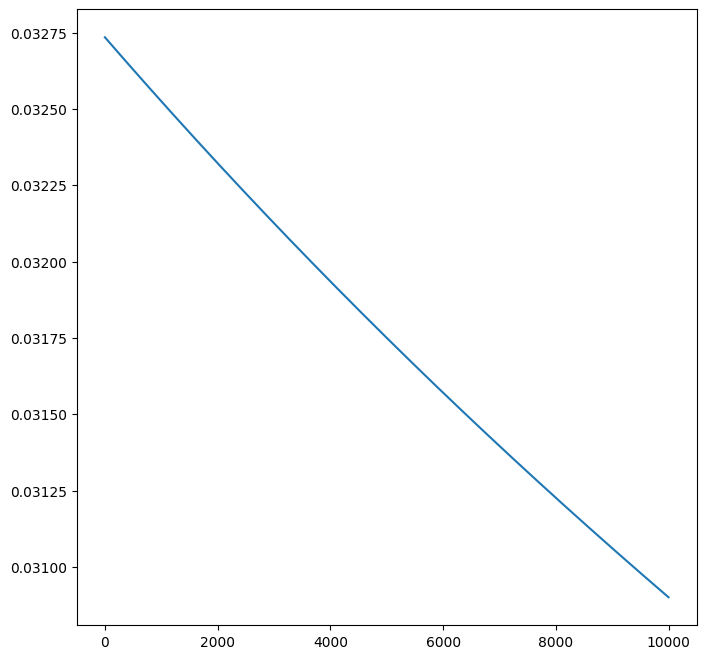

In [99]:
plt.figure(figsize=(8,8))
plt.plot(losses)
plt.show()

We can check the accuracy for the training data as

In [ ]:
acc=((torch.max(y_pred,1)[1]==torch.max(y,1)[1]).type(torch.FloatTensor).sum()/300.0).data
print("An accuracy of %.1f%%."%(acc*100))

An accuracy of 99.7%.


**Exercise(Hard):** Convince yourself that this is a minimun by doing the following.
1. Find the value of W and b after the number of steps.
2. Suppose $(e_1,e_2)=xW+b$, write $e_1$ and $e_2$ in terms of $x_1$ and $x_2$, $x=(x_1,x_2)$.
3. If $e_1\geq e_2$, then $x$ is a blue point or a red point?

### Neural Networks are not magic boxes

Let's play the same game with a different regions.

In [ ]:
blue = np.array([x for x in points  if x[0]**2+x[1]**2<1  ])
red = np.array([x for x in points  if x[0]**2+x[1]**2>1  ])
color=np.array([[1,0] if x[0]**2+x[1]**2<1 else [0,1] for x in points])

There are about the same number of blue and red points.

In [ ]:
len(blue),len(red)

(142, 158)

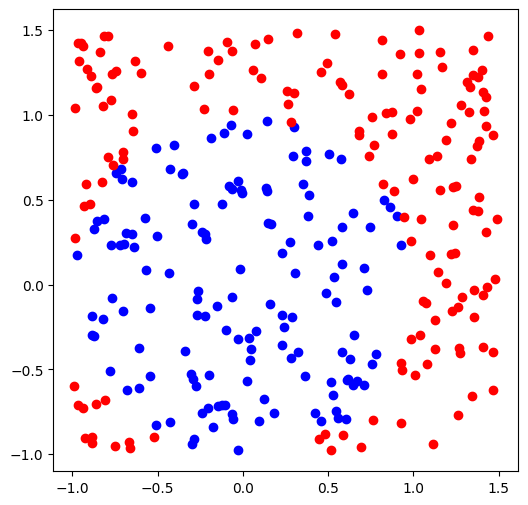

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(blue[:,0],blue[:,1],c='b')
plt.scatter(red[:,0],red[:,1],c='r')
plt.show()

**Question:** Can a 1 layer NN classify these points?

The challenge for this problem is to build a NN that does a good job classifying the points. But this may prove harder than what it seems. For example let's use a 2 layer neural network of intermediate sizes 20, 50, and let's end with the softmax layer.

In [ ]:
X=Variable(torch.from_numpy(points), requires_grad=False).type(torch.DoubleTensor)
y=Variable(torch.from_numpy(color), requires_grad=False).type(torch.DoubleTensor)

W1=Variable(torch.rand(2,20).type(torch.DoubleTensor),requires_grad=True)
W2=Variable(torch.rand(20,50).type(torch.DoubleTensor),requires_grad=True)
W3=Variable(torch.rand(50,2).type(torch.DoubleTensor),requires_grad=True)

b1=Variable(torch.zeros(1,20).type(torch.DoubleTensor),requires_grad=True)
b2=Variable(torch.zeros(1,50).type(torch.DoubleTensor),requires_grad=True)
b3=Variable(torch.zeros(1,2).type(torch.DoubleTensor),requires_grad=True)


Question: We said build a 2 layer network, but we have 3 sets of weights. Why?


We use tanh for the activation function

In [ ]:
from torch.nn.functional import tanh
from time import time

and we run this a number of times

In [ ]:
step=0.01
losses=[]
start=time()
for i in range(20000):
    print("step %d"%i,end="\r")
    l1=tanh(X.mm(W1)+b1)
    l2=tanh(l1.mm(W2)+b2)
    y_pred=softmax(l2.mm(W3)+b3,dim=1)

    loss = binary_cross_entropy(y_pred,y)

    #compute gradients
    loss.backward()

    #update values
    W1.data-= step*W1.grad.data
    W2.data-= step*W2.grad.data
    W3.data-= step*W3.grad.data

    b1.data-= step*b1.grad.data
    b2.data-= step*b2.grad.data
    b3.data-= step*b3.grad.data

    #reset gradients
    W1.grad.data.zero_()
    W2.grad.data.zero_()
    W3.grad.data.zero_()

    b1.grad.data.zero_()
    b2.grad.data.zero_()
    b3.grad.data.zero_()

    losses.append(loss)
end=time()
print("It took %.2f seconds"%(end-start))

It took 30.18 seconds


The loss function looks like

In [ ]:
losses = [item.detach().numpy() for item in losses]

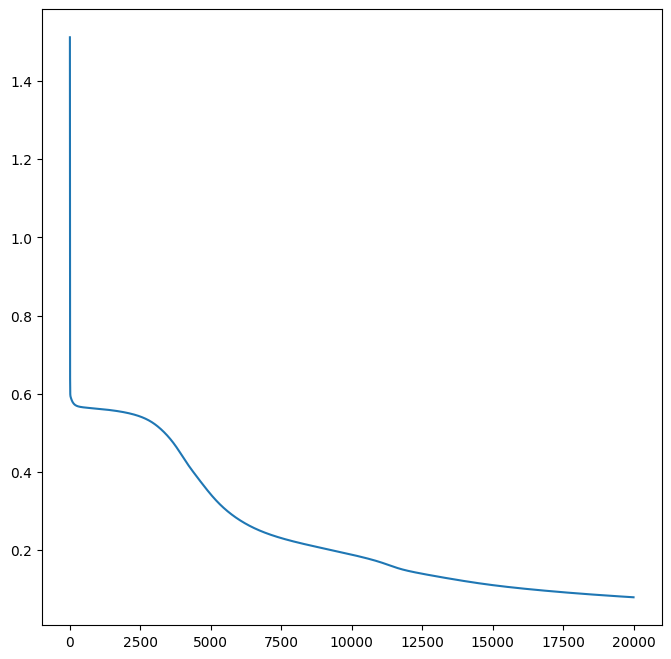

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(losses)
plt.show()

Which gives an accuracy of

In [ ]:
(torch.max(y_pred,1)[1]==torch.max(y,1)[1]).type(torch.FloatTensor).sum()/300

tensor(0.9867)

compare this with random which should give

In [ ]:
len(blue)/300

0.47333333333333333

## Wrappers for layers

So far we finished building the NN layers manually.

It would be a pain if every time we need to build a layer we have to type all this. Instead we can use the [torch.nn library](http://pytorch.org/docs/master/nn.html). In this case we can create a (feed forward) neural network as follows.

Let's build the same size network, first layer has 20 outputs, 2nd has 50, and last is the output layer.

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2,20), # This is equivalent to perceptron
    torch.nn.Tanh(),
    torch.nn.Linear(20,50),
    torch.nn.Tanh(),
    torch.nn.Linear(50,2),
    torch.nn.Softmax(dim=1)).type(torch.DoubleTensor)

we can use the same loss funciton as before

In [ ]:
# Learning rate for updating model parameters
step=0.01

# List to keep track of the loss value at each training step
losses=[]

# Record the starting time of the training
start=time()

# The model will be trained for 20,000 iterations
for i in range(20000):
    print("step %d"%i,end="\r")

    # Forward pass: Compute predictions based on the current model parameters and input data X
    y_pred = model(X)

    # Compute the loss using the predicted and actual labels
    loss = binary_cross_entropy(y_pred,y)

    # Append the loss to the list
    losses.append(loss)

    # Zero out the gradients to ensure they don't accumulate over iterations
    model.zero_grad()

    # Backward pass: Compute gradients of the loss with respect to model parameters
    loss.backward()

    # Update model parameters using simple gradient descent
    for param in model.parameters():
        param.data -= step*param.grad.data

end=time()
print("It took %.2f seconds"%(end-start))

It took 24.39 seconds


And let's see this graph

In [ ]:
losses = [item.detach().numpy() for item in losses]

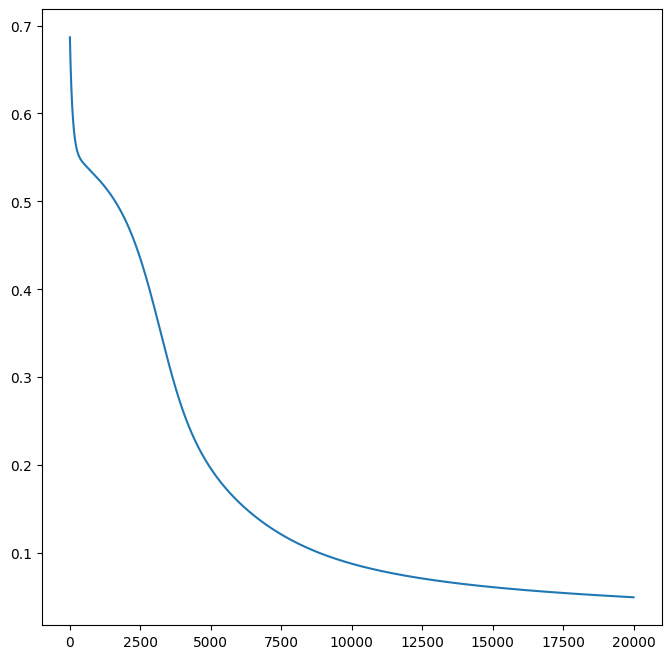

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(losses)
plt.show()

In [ ]:
(torch.max(y_pred,1)[1]==torch.max(y,1)[1]).type(torch.FloatTensor).sum()/300

tensor(0.9900)

## The module version

With PyTorch Layer Wrapper, we can build the layer much more easily.

But the more easier and common way is to do it via implementation of the class `torch.nn.Module`

Modules automatically detect all differentiable layers, and create all the necessary weights to train the network.

They are a basic python class that inherits from `torch.nn.Module`

In PyTorch, when you define a custom neural network model, you typically subclass torch.nn.Module. Within this subclass, there are two primary methods you usually define: **`__init__`** and **`forward`**.

1. **`__init__(self, ...)`**:

    The __init__ method is the initializer (or constructor) for the class. This is a standard method in Python for initializing objects. In the context of torch.nn.Module:

    **Purpose**: Initialize the layers and parameters of the neural network. This is where you define the architecture of your neural network in terms of layers (e.g., linear layers, convolutional layers, activation functions).

    **Parameters**: It can take any parameters necessary to specify the architecture or behavior of the model. For example, for a multi-layer perceptron, you might pass in the sizes of the input, hidden, and output layers.

2. **`forward(self, x)`**:

    The forward method defines the forward pass of the neural network.

    **Purpose**: Describe how the input x is transformed as it passes through the network. It's essentially the sequence of operations applied to the input data to produce the output.

    **Parameters**: The primary input is the data x you want to pass through the network. There can be additional parameters depending on the specific requirements of your model.

    **Return Value**: The output of the network after processing the input x.

    **Note**: While you define the forward method, you usually don't call it directly. Instead, when you invoke the call on an instance of the model (model(x)), it internally calls forward(x).

### Model Build

In [ ]:
# Define a custom PyTorch model class, inheriting from torch.nn.Module
class OurModel(torch.nn.Module):

    # The __init__ method is where you define the layers and other model components.
    #                  input_size  hidden_size1  hidden_size2  ouput_size
    def __init__(self,D_in,       H1,           H2,           D_out):
        """
        In the constructor, we define three layers: two hidden layers and one output layer.

        Parameters:
        - D_in (int): Size of input features.
        - H1 (int): Size of the first hidden layer.
        - H2 (int): Size of the second hidden layer.
        - D_out (int): Size of the output layer.
        """

        # Call the __init__ method of the parent class (torch.nn.Module)
        super(OurModel,self).__init__()

        # Define the first linear layer, mapping from input to the first hidden layer.
        self.layer1 = torch.nn.Linear(D_in,H1)

        # Define the second linear layer, mapping from the first hidden layer to the second hidden layer.
        self.layer2 = torch.nn.Linear(H1,H2)

        # Define the output layer, mapping from the second hidden layer to the output.
        self.outlayer = torch.nn.Linear(H2,D_out)

    # The forward method is where you define how your model is going to be run,
    # from input to output. It's the actual network transformation.
    def forward(self,x):
        """
        In the forward function, we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.

        Parameters:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Output tensor after passing through the layers and activation functions.
        """

        # Pass input through the first layer and apply the tanh activation function.
        x = tanh(self.layer1(x))

        # Pass through the second layer and apply the tanh activation function.
        x = tanh(self.layer2(x))

        # Pass through the output layer and apply the softmax activation function.
        # The softmax function is often used for the output layer in classification tasks.
        return softmax(self.outlayer(x),dim=1)

### Model Training

In [ ]:
# Instantiate the OurModel class, passing the dimensions for input,
# two hidden layers, and output. Use .double() to ensure the model
# uses double precision (as opposed to the default single precision)
ourModel_ = OurModel(2,20,50,2).double()

In [ ]:
# Set the learning rate for the gradient descent optimizer.
step=0.01

# Initialize an empty list to keep track of the loss at each training step.
losses=[]

# Record the starting time of the training for performance evaluation.
start=time()

# Start the training loop, running for 10^4 iterations.
for i in range(10**4):

    print("step %d"%i,end="\r")

    # Zero out the gradients of the model parameters to ensure they don't accumulate.
    ourModel_.zero_grad()

    # Forward pass: Compute the predicted outputs by passing inputs to the model.
    y_pred = ourModel_.forward(X) # Note: Directly calling ourModel(X) would also work due to PyTorch’s syntactic sugar.

    # Compute the loss between the predictions and actual values using binary cross entropy.
    loss = binary_cross_entropy(y_pred,y)

    # Backward pass: Compute the gradient of the loss with respect to model parameters.
    loss.backward()

    # Manual parameter update step: for each parameter, adjust in the opposite direction of the gradient.
    for param in ourModel_.parameters():
        param.data -= step*param.grad.data

    # Append the current loss to the 'losses' list to keep track.
    losses.append(loss)

# Record the ending time of the training.
end=time()

print("It took %.2f seconds"%(end-start))

It took 14.79 seconds


In [ ]:
losses = [item.detach().numpy() for item in losses]

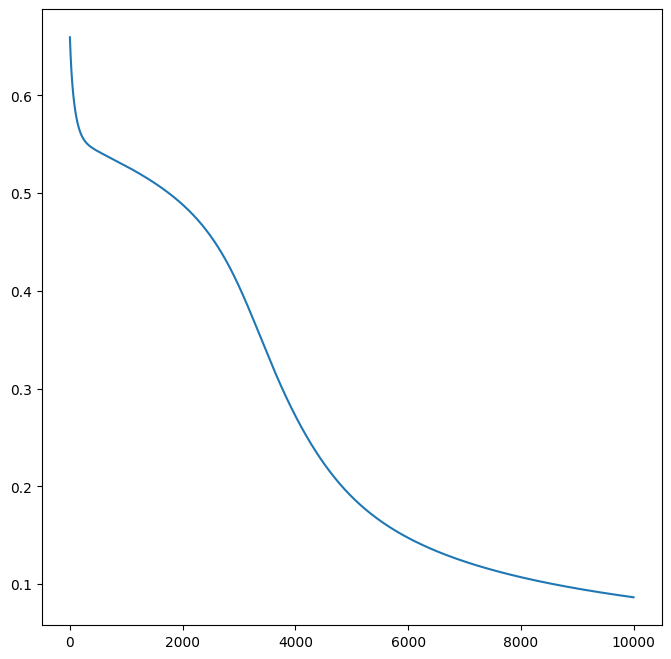

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(losses)
plt.show()

In [ ]:
(torch.max(y_pred,1)[1]==torch.max(y,1)[1]).type(torch.FloatTensor).sum()/300

tensor(0.9833)

In the previous training steps, we utilized a *fixed* learning rate and manually executed the update of weights and biases after calculating the gradients. While this method is fundamentally sound and educational, it can be numerically less stable and suboptimal in terms of computational efficiency.

By incorporating `torch.optim`, a package within PyTorch that provides various optimization algorithms, we can streamline and enhance our training process. The PyTorch optimizer automates the update of model parameters (like weights and biases) and can also easily accommodate dynamic learning rate adjustments, which can lead to more numerically stable and, often, faster training.

Here's an example to illustrate how this can be implemented:

In [ ]:
# check the optimizer we can use
dir(torch.optim)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

In [ ]:
# We will use the Adam optimizer in this demo

ourModel = OurModel(2, 20, 50, 2).double()

# Initialize the Adam optimizer.
# Pass the model parameters (which we want to optimize), and set the learning rate.
optimizer = torch.optim.Adam(ourModel.parameters(), lr=0.01)

# To store loss values for later analysis.
losses = []

start = time()

for i in range(10**4):

    print("step %d" % i, end="\r")

    # Zero out the gradients to ensure they don't accumulate.
    optimizer.zero_grad()

    # Forward pass: Compute the predicted outputs.
    y_pred = ourModel(X)  # Note: Direct call uses the .forward() method internally.

    # Compute the loss.
    loss = binary_cross_entropy(y_pred, y)

    # Backward pass: compute gradient of the loss with respect to model parameters.
    loss.backward()

    # Update the model parameters.
    optimizer.step()

    losses.append(loss.item())  # Note: .item() gets the scalar value held in the loss tensor.

end = time()
print("It took %.2f seconds" % (end-start))

It took 21.21 seconds


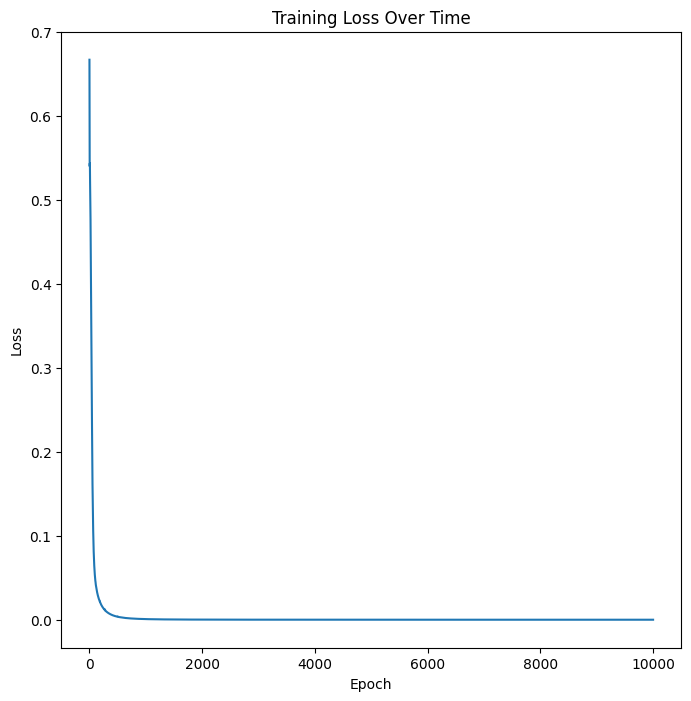

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

In [ ]:
(torch.max(y_pred,1)[1]==torch.max(y,1)[1]).type(torch.FloatTensor).sum()/300

tensor(1.)

### Model Validation and Evaluation

We can use `model.eval()` and `torch.no_grad()` to do the model validation and evaluation during the training process.

- **model.eval()**

    `model.eval()` sets the model to evaluation mode. This is critical for models with layers that have different behaviors during training versus testing, like Dropout and BatchNorm layers. Here's what happens:

    - **Dropout Layers**: During training (model.train()), dropout is active, randomly zeroing some of the units in the layer to prevent co-adaptation of hidden units. However, during evaluation (model.eval()), dropout is turned off, and the layer behaves normally, allowing all activations to pass through.

    - **BatchNorm Layers**: During training, batch normalization uses batch statistics. During evaluation, it uses the running statistics computed during training.
    
- **torch.no_grad()**

    `torch.no_grad()` is a context manager that disables gradient computation, which is useful during inference/validation/test phases where backpropagation (i.e., gradient computation) is unnecessary. Here’s why it’s essential:

    - Memory Efficiency: Since the model doesn’t need to store the gradients, using torch.no_grad() saves memory, enabling you to run the model on larger data or on devices with limited memory.

    - Computational Efficiency: Preventing gradient computation reduces computational overhead, thus making inference faster.


To demo the process of validation and evaluation, let's re-generate the training dataset, validation dataset and test dataset using the same logic first.

In [ ]:
10**4/100

100.0

In [100]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate a large dataset
points = 2.5 * np.random.random((1000, 2)) - 1
color = np.array([[1, 0] if 2*x[0]-x[1] < 1 else [0, 1] for x in points])

# Convert to PyTorch tensors
X = Variable(torch.from_numpy(points), requires_grad=False).type(torch.DoubleTensor)
y = Variable(torch.from_numpy(color), requires_grad=False).type(torch.DoubleTensor)

# Split into training, validation, and test sets
total_samples = X.shape[0]

# Indices for all samples
indices = list(range(total_samples))
# Shuffle them
np.random.shuffle(indices)

# Define split sizes
train_split = int(total_samples * 0.7)  # 70% training data
val_split = int(total_samples * 0.2)    # 20% validation data
# Remaining 10% will be test data
test_split = total_samples - train_split - val_split #
# Split the indices
train_indices = indices[:train_split]
val_indices = indices[train_split:train_split+val_split]
test_indices = indices[train_split+val_split:]

# Create data subsets
X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]
X_test, y_test = X[test_indices], y[test_indices]


In [102]:
# its shuffled
indices

[717,
 105,
 690,
 683,
 521,
 890,
 230,
 990,
 605,
 330,
 922,
 859,
 255,
 165,
 756,
 908,
 354,
 499,
 912,
 486,
 199,
 701,
 79,
 931,
 243,
 784,
 321,
 810,
 470,
 302,
 474,
 14,
 880,
 854,
 196,
 510,
 344,
 538,
 958,
 846,
 325,
 150,
 457,
 832,
 228,
 906,
 681,
 556,
 149,
 641,
 783,
 957,
 883,
 262,
 573,
 989,
 427,
 982,
 136,
 904,
 498,
 853,
 5,
 715,
 229,
 862,
 35,
 501,
 256,
 818,
 845,
 685,
 825,
 544,
 615,
 315,
 838,
 750,
 1,
 179,
 864,
 741,
 70,
 77,
 184,
 939,
 633,
 917,
 291,
 542,
 938,
 357,
 660,
 94,
 129,
 969,
 562,
 813,
 93,
 208,
 522,
 458,
 211,
 10,
 23,
 716,
 350,
 186,
 327,
 185,
 84,
 843,
 328,
 903,
 878,
 656,
 655,
 59,
 32,
 28,
 89,
 765,
 860,
 567,
 512,
 755,
 959,
 447,
 900,
 220,
 367,
 410,
 970,
 487,
 517,
 137,
 469,
 120,
 844,
 429,
 404,
 49,
 87,
 704,
 37,
 95,
 17,
 579,
 987,
 497,
 525,
 564,
 372,
 896,
 297,
 945,
 281,
 806,
 373,
 384,
 236,
 732,
 836,
 867,
 389,
 712,
 109,
 540,
 13,
 769,
 502

In [105]:
X[[1,2,3]]

tensor([[ 0.8300,  0.4966],
        [-0.6100, -0.6100],
        [-0.8548,  1.1654]], dtype=torch.float64)

In [109]:
2*(0.8300)+ 0.4966

2.1566

In [106]:
y[[1,2,3]]

tensor([[0., 1.],
        [1., 0.],
        [1., 0.]], dtype=torch.float64)

In [101]:
total_samples

1000

In [ ]:
ourModel = OurModel(2, 20, 50, 2).double()
optimizer = torch.optim.Adam(ourModel.parameters(), lr=0.01)
losses = []
val_accuracies = []

patience = 5
patience_counter = 0

start = time()
for i in range(10**4):

    print("step %d" % i, end="\r")

    # Training
    optimizer.zero_grad()
    y_pred = ourModel(X_train)
    loss = binary_cross_entropy(y_pred, y_train)
    loss.backward()
    optimizer.step()

    # max_val_acc = 0

    losses.append(loss.item())

    # Validation
    if i % 100 == 0:  # validate every 100 iterations
        max_val_acc = 0
        with torch.no_grad():  # disable gradient computation during validation
            ourModel.eval()  # set the model to evaluation mode

            y_val_pred = ourModel(X_val)
            val_accuracy = (y_val_pred.argmax(dim=1) == y_val.argmax(dim=1)).float().mean()

            if val_accuracy > max_val_acc:
                max_val_acc = val_accuracy
                patience_counter = 0
            else:
                patience_counter += 1

            val_accuracies.append(val_accuracy.item())
            print(f"Step {i}, Validation Accuracy: {val_accuracy.item():.4f}")

        ourModel.train()  # switch back to training mode

end = time()
print("Training took %.2f seconds" % (end-start))

# Final Evaluation on Test Data
ourModel.eval()  # set model to evaluation mode
with torch.no_grad():  # disable gradient computation during testing
    y_test_pred = ourModel(X_test)
    test_accuracy = (y_test_pred.argmax(dim=1) == y_test.argmax(dim=1)).float().mean()
    print(f"Final Test Accuracy: {test_accuracy.item():.4f}")

Step 0, Validation Accuracy: 0.6350
Step 100, Validation Accuracy: 1.0000
Step 200, Validation Accuracy: 1.0000
Step 300, Validation Accuracy: 1.0000
Step 400, Validation Accuracy: 1.0000
Step 500, Validation Accuracy: 1.0000
Step 600, Validation Accuracy: 1.0000
Step 700, Validation Accuracy: 1.0000
Step 800, Validation Accuracy: 1.0000
Step 900, Validation Accuracy: 1.0000
Step 1000, Validation Accuracy: 1.0000
Step 1100, Validation Accuracy: 1.0000
Step 1200, Validation Accuracy: 1.0000
Step 1300, Validation Accuracy: 1.0000
Step 1400, Validation Accuracy: 1.0000
Step 1500, Validation Accuracy: 1.0000
Step 1600, Validation Accuracy: 1.0000
Step 1700, Validation Accuracy: 1.0000
Step 1800, Validation Accuracy: 1.0000
Step 1900, Validation Accuracy: 1.0000
Step 2000, Validation Accuracy: 1.0000
Step 2100, Validation Accuracy: 1.0000
Step 2200, Validation Accuracy: 1.0000
Step 2300, Validation Accuracy: 1.0000
Step 2400, Validation Accuracy: 1.0000
Step 2500, Validation Accuracy: 1.000

**Question**:

In the training process, we use `loss.backward()` to calculate the gradient, but in the validation, we didn't use it so that no gradient will be calculated during this process. Why do we still need `torch.no_grad()`?

<details>
    <summary>>Answer(Click to expand)</summary>
<br />    
During the validation process, we do not use `loss.backward()` because we do not need to calculate gradients - we are not updating the model's weights during validation, just evaluating its performance. So, why do we use `torch.no_grad()` during validation if no gradients are calculated?
    
<br />
    
Here's why:
    
<br />
    
- **Memory Efficiency**:
    
    When using PyTorch, even if we don't calculate gradients, the computation graph for the forward pass is built up during model inference, which consumes memory for storing intermediate results that are necessary for back-propagation. `torch.no_grad()` tells PyTorch that we do not want to build this graph, saving memory.
    
<br />
    
- **Computational Efficiency**:
    
    In addition to memory usage, using `torch.no_grad()` can also provide some computational efficiency because it informs the model that it doesn't need to keep track of the computations in the forward pass in a way that facilitates gradient calculation later. Some model layers or types (like batch normalization, dropout layers, etc.) may behave differently during training vs. evaluation. By not building the computational graph, we reduce the overall computational requirements during the forward pass.
    
<br />
    
- **Explicit Code Semantics**
    
    Using `torch.no_grad()` explicitly communicates the intent of the code block: the enclosed operations are purely for inference and not for training. It clearly delineates sections of code used for training from those used for evaluation, which is good practice for code readability and maintainability.
</details>